## This script is used to visualize SWE reanalysis data 

### Metadata is [here](http://himat.org/team-documents/data-access/SWE-reanalysis/)

In [1]:
%matplotlib inline 
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import pandas as pd
import numpy as np
import xarray
import xarray.ufuncs as xu
import dask
import seaborn as sn
from datetime import datetime
from dask.diagnostics import ProgressBar
import netCDF4
import warnings
warnings.filterwarnings('ignore')

/home/aarendt/anaconda3/envs/himat/lib/python3.6/site-packages/matplotlib/font_manager.py:280: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  'Matplotlib is building the font cache using fc-list. '


In [3]:
#Open forcings netcdf file and check the contents
ds = xarray.open_dataset('/att/pubrepo/hma_data/products/SWE_reanalysis/v0/N37_0E74_0_agg_16_FORCING_POST_WY2007_08.nc')
ds

<xarray.Dataset>
Dimensions:    (Day: 366, Latitude: 225, Longitude: 225)
Coordinates:
  * Latitude   (Latitude) float64 38.0 37.99 37.99 37.98 37.98 37.98 37.97 ...
  * Longitude  (Longitude) float64 74.0 74.01 74.01 74.02 74.02 74.02 74.03 ...
Dimensions without coordinates: Day
Data variables:
    Ta_Post    (Day, Longitude, Latitude) float64 269.9 269.6 270.1 270.3 ...
    Rs_Post    (Day, Longitude, Latitude) float64 177.8 258.7 246.8 218.1 ...
    Rl_Post    (Day, Longitude, Latitude) float64 208.3 207.6 209.1 210.7 ...
    Ps_Post    (Day, Longitude, Latitude) float64 620.0 617.3 622.5 624.9 ...
    PPT_Post   (Day, Longitude, Latitude) float64 0.0 0.0 0.0 0.0 0.0 0.0 ...
    q_Post     (Day, Longitude, Latitude) float64 0.0016 0.0016 0.0016 ...

In [4]:
# At time coordinates instead of n days
ds.coords['time'] = pd.date_range('2007-10-01', periods=366)
ds

<xarray.Dataset>
Dimensions:    (Day: 366, Latitude: 225, Longitude: 225, time: 366)
Coordinates:
  * Latitude   (Latitude) float64 38.0 37.99 37.99 37.98 37.98 37.98 37.97 ...
  * Longitude  (Longitude) float64 74.0 74.01 74.01 74.02 74.02 74.02 74.03 ...
  * time       (time) datetime64[ns] 2007-10-01 2007-10-02 2007-10-03 ...
Dimensions without coordinates: Day
Data variables:
    Ta_Post    (Day, Longitude, Latitude) float64 269.9 269.6 270.1 270.3 ...
    Rs_Post    (Day, Longitude, Latitude) float64 177.8 258.7 246.8 218.1 ...
    Rl_Post    (Day, Longitude, Latitude) float64 208.3 207.6 209.1 210.7 ...
    Ps_Post    (Day, Longitude, Latitude) float64 620.0 617.3 622.5 624.9 ...
    PPT_Post   (Day, Longitude, Latitude) float64 0.0 0.0 0.0 0.0 0.0 0.0 ...
    q_Post     (Day, Longitude, Latitude) float64 0.0016 0.0016 0.0016 ...

In [5]:
# Create a new precipitation variable that uses time instead of n days
ds['prec'] = (('time', 'Longitude', 'Latitude'), ds.PPT_Post.values)

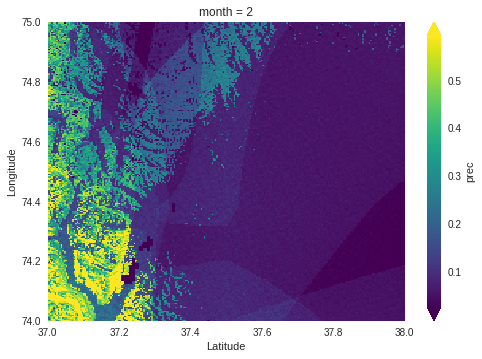

In [6]:
# Calculate monthly mean and produce spatial plot

ds_by_month = ds.prec.groupby('time.month').mean('time')
prec_month = ds_by_month.sel(month=2)
with ProgressBar():
    prec_month.plot(robust=True)


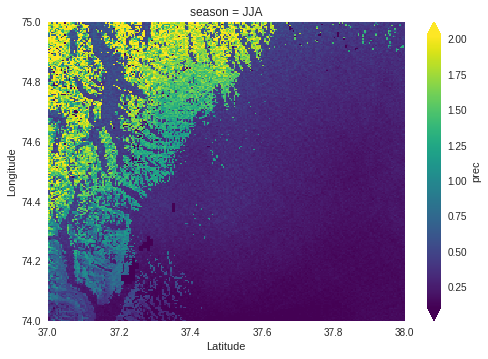

In [7]:
# Plot precipitation by season

ds_by_season = ds.prec.groupby('time.season').mean('time')
prec_seasonal = ds_by_season.sel(season='JJA')
with ProgressBar():
    prec_seasonal.plot(robust=True)

In [9]:
#Open SWE netcdf file, add a time dimension and check the contents

ds_swe = xarray.open_dataset('/att/pubrepo/hma_data/products/SWE_reanalysis/v0/N37_0E74_0_agg_16_SWE_SCA_POST_WY2007_08.nc')
ds_swe.coords['time'] = pd.date_range('2007-10-01', periods=366)
ds_swe

<xarray.Dataset>
Dimensions:    (Day: 366, Latitude: 225, Longitude: 225, Stats: 5, time: 366)
Coordinates:
  * Latitude   (Latitude) float64 38.0 37.99 37.99 37.98 37.98 37.98 37.97 ...
  * Longitude  (Longitude) float64 74.0 74.01 74.01 74.02 74.02 74.02 74.03 ...
  * time       (time) datetime64[ns] 2007-10-01 2007-10-02 2007-10-03 ...
Dimensions without coordinates: Day, Stats
Data variables:
    SWE_Post   (Day, Stats, Longitude, Latitude) float64 0.0 0.0 0.0 0.0 0.0 ...
    SCA_Post   (Day, Stats, Longitude, Latitude) float64 0.0 0.0 0.0 0.0 0.0 ...

In [10]:
# Add a new variable called swe_post that has the dimensions time, Stats, Lon & Lat
ds_swe['swe_post'] = (('time', 'Stats', 'Longitude', 'Latitude'), ds_swe.SWE_Post.values)

In [11]:
ds_swe_med = ds_swe.swe_post.isel(Stats=[3])

In [12]:
ds_swe_by_season = ds_swe_med.groupby('time.season').mean('time')

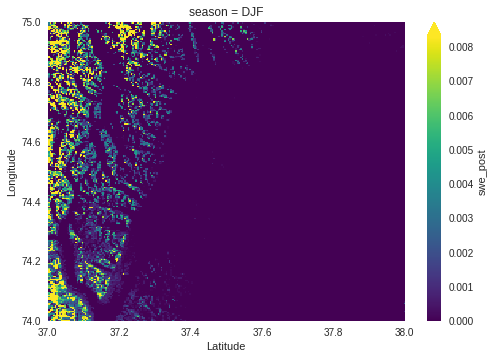

In [14]:
swe_seasonal = ds_swe_by_season.sel(season='DJF')
swe_seasonal.plot(robust=True)